# Jupiter Notebook 
## for training of simple classifiers and interpretability methods

In [ ]:
# load dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("depression_detection_features.csv")
df.head()

,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [ ]:
# Check the total size of the dataset
df.shape

(219, 14)

In [3]:
# Check variable types
df.dtypes

depression_label                   int64
frequency_of_speech                int64
mean_length_of_speech            float64
mean_word_length                 float64
flair_sentiment                    int64
flair_score                      float64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [4]:
# Check for missing values
df.isnull().sum()

depression_label                 0
frequency_of_speech              0
mean_length_of_speech            0
mean_word_length                 0
flair_sentiment                  0
flair_score                      0
average_frequency_nouns          0
average_frequency_verbs          0
average_frequency_adjectives     0
average_frequency_adverbs        0
average_frequency_firstperson    0
speech_speed                     0
unique_word_count                0
stop_word_frequency              0
dtype: int64

# Checking for correlations

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

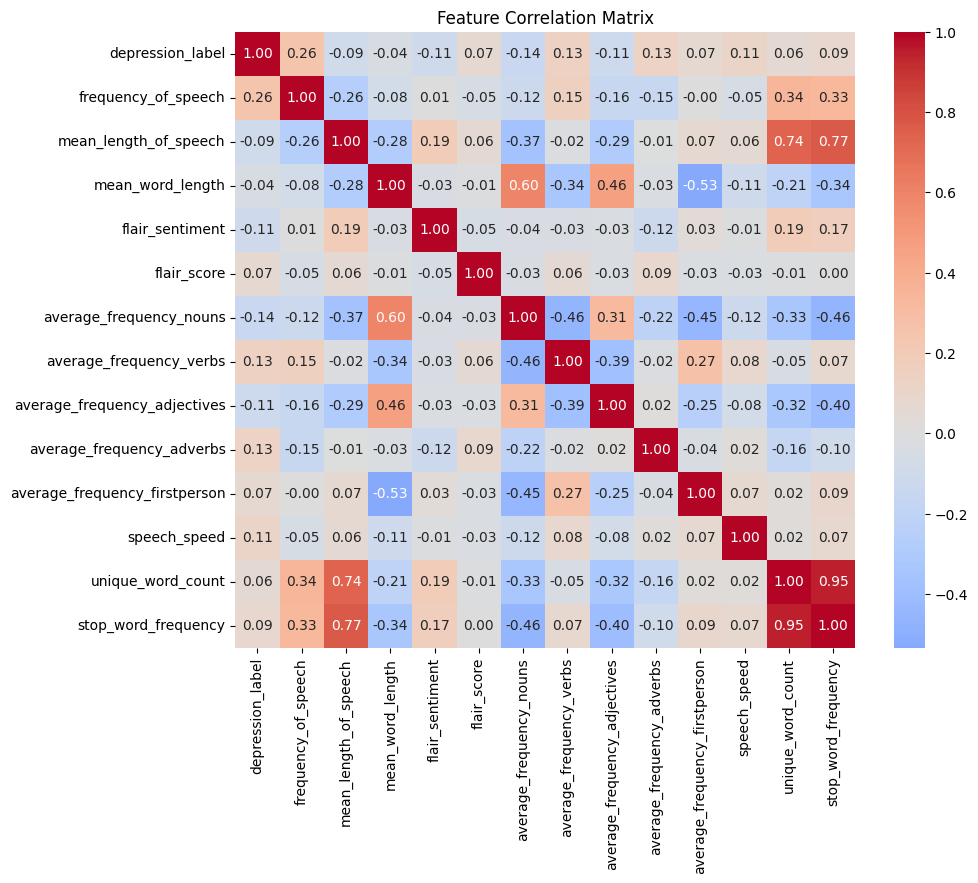

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Preparing the data for ML classification

Input features (all or a selection)
- frequency_of_speech
- mean_length_of_speech
- mean_word_length
- flair_sentiment
- flair_score
- average_frequency_nouns
- average_frequency_verbs
- average_frequency_adjectives
- average_frequency_adverbs
- average_frequency_firstperson
- speech_speed
- unique_word_count
- stop_word_frequency

Binary target class (could be changed, having different categories for depresion)
- depression_label (0 for no depression, 1 for depression)

In [8]:
import numpy as np

# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [9]:
# Convert DataFrame to numpy array
numpy_array = df.values
print(numpy_array)

[[0.00000000e+00 7.70000000e+01 4.18181818e+00 ... 4.23795736e-01
  1.73000000e+02 1.74000000e+02]
 [0.00000000e+00 7.20000000e+01 1.94305556e+01 ... 1.05848528e+00
  3.64000000e+02 9.07000000e+02]
 [0.00000000e+00 9.90000000e+01 6.15151515e+00 ... 6.25064149e-01
  2.86000000e+02 3.30000000e+02]
 ...
 [0.00000000e+00 8.30000000e+01 5.61445783e+00 ... 2.70615563e+00
  2.15000000e+02 2.60000000e+02]
 [0.00000000e+00 9.70000000e+01 8.56701031e+00 ... 2.66859345e+00
  3.20000000e+02 4.97000000e+02]
 [0.00000000e+00 1.11000000e+02 6.09909910e+00 ... 6.65879807e-01
  2.70000000e+02 4.22000000e+02]]


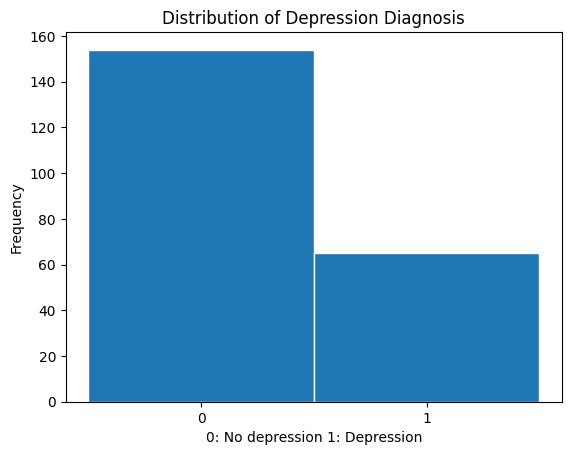

In [12]:
target_column = 'depression_label'

# Histogram for target class
plt.hist(df[target_column], bins=[-0.5, 0.5, 1.5], edgecolor='white')
plt.title('Distribution of Depression Diagnosis')
plt.xlabel('0: No depression 1: Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()

In [13]:
# Check for class imbalance
print(df[target_column].value_counts())

depression_label
0    154
1     65
Name: count, dtype: int64


In [14]:
# Code that separates data into features X and target variable y
X_array = df.drop([target_column], axis=1).values
y_array = df[target_column].values

### Stratified train-test partitioning
- generate X_train, X_test, y_train, y_test maintaining 20% in the test set
- additionally generate X_train_norm, X_test_norm for KNN and SVM classifier

*Explanation* of stratified train-test partitioning and its advantages:
- Stratified train-test partitioning involves splitting the dataset into train and test sets while maintaining the proportion of classes in each subset similar to that in the original dataset. 
- This is beneficial for datasets with unequal distribution ensuring both sets represent the class distribution accurately and improving model training and evaluation on minority classes.

In [15]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array, 
                                                    y_array, 
                                                    test_size=0.2, 
                                                    stratify=y_array, 
                                                    random_state=RANDOM_SEED)

In [16]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_normalized = scaler.fit_transform(X_array)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_array_normalized,
                                                              y_array,
                                                              test_size=0.2,
                                                              stratify=y_array, 
                                                              random_state=RANDOM_SEED)

### Model training

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
models = {
    "DT1": DecisionTreeClassifier(max_depth=2, random_state=RANDOM_SEED),
    "DT2": DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED),
    "RF1": RandomForestClassifier(n_estimators=5, max_depth=2, random_state=RANDOM_SEED),
    "RF2": RandomForestClassifier(n_estimators=60, max_depth=10, random_state=RANDOM_SEED),
    "GBDT1": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=RANDOM_SEED),
    "GBDT2": GradientBoostingClassifier(n_estimators=5, learning_rate=0.01, max_depth=5, random_state=RANDOM_SEED),
}

# We can iterate over the dictionary as follows:
for name, classifier in models.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT1  and it is a sklearn object: DecisionTreeClassifier(max_depth=2, random_state=2023)
The name of the classifier is: DT2  and it is a sklearn object: DecisionTreeClassifier(max_depth=10, random_state=2023)
The name of the classifier is: RF1  and it is a sklearn object: RandomForestClassifier(max_depth=2, n_estimators=5, random_state=2023)
The name of the classifier is: RF2  and it is a sklearn object: RandomForestClassifier(max_depth=10, n_estimators=60, random_state=2023)
The name of the classifier is: GBDT1  and it is a sklearn object: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=2023)
The name of the classifier is: GBDT2  and it is a sklearn object: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=5,
                           random_state=2023)


In [19]:
# Another dictionary for KNN and SVM classifier

models_normdata = {
    "KNN1": KNeighborsClassifier(n_neighbors=5),
    "KNN2": KNeighborsClassifier(n_neighbors=10),
    "SVM1": SVC(kernel='rbf', random_state=RANDOM_SEED),
    "SVM2": SVC(kernel='linear', random_state=RANDOM_SEED),
}

# Iterate over the dictionary as follows:
for name_norm, classifier_norm in models_normdata.items():
    print("The name of the classifier is:", name_norm, " and it is a sklearn object:", classifier_norm)

The name of the classifier is: KNN1  and it is a sklearn object: KNeighborsClassifier()
The name of the classifier is: KNN2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=10)
The name of the classifier is: SVM1  and it is a sklearn object: SVC(random_state=2023)
The name of the classifier is: SVM2  and it is a sklearn object: SVC(kernel='linear', random_state=2023)


In [20]:
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1


In [21]:
results_norm = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })
results_norm

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1


In [22]:
import time

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
# Apply the classifier in each dataset
for name, classifier in models.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT1,0.039052,0.001993,0.659091,0.333333,0.153846,0.210526
1,DT2,0.003000,0.000000,0.568182,0.200000,0.153846,0.173913
2,RF1,0.020220,0.001997,0.727273,0.666667,0.153846,0.250000
3,RF2,0.117595,0.008001,0.681818,0.400000,0.153846,0.222222
4,GBDT1,0.425020,0.002002,0.681818,0.333333,0.076923,0.125000
5,GBDT2,0.018534,0.000000,0.704545,0.000000,0.000000,0.000000


In [25]:
# Apply the classifier in each dataset with normalized data
for name_norm, classifier_norm in models_normdata.items():

    # Start measuring the training time
    t_start_norm = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier_norm.fit(X_train_norm,y_train)
    # Stop measuring training time
    t_end_norm = time.time()
    # Calculate Variable of interest `training_time`
    training_time_norm = t_end_norm - t_start_norm
    #######

    # Start measuring the prediction time
    t_start_norm = time.time()
    # Predict on test set
    y_predicted_norm = classifier_norm.predict(X_test_norm)
    # Stop measuring prediction time
    t_end_norm = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time_norm = t_end_norm - t_start_norm
    #######


    # Get performance metrics
    accuracy_result_norm = accuracy_score(y_test, y_predicted_norm)
    precision_result_norm = precision_score(y_test, y_predicted_norm)
    recall_result_norm = recall_score(y_test, y_predicted_norm)
    f1_result_norm = f1_score(y_test, y_predicted_norm)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result_norm = pd.DataFrame({
                    "classifier_name": [name_norm],
                    "training_time": [training_time_norm],
                    "prediction_time": [prediction_time_norm],
                    "accuracy": [accuracy_result_norm],
                    "precision": [precision_result_norm],
                    "recall": [recall_result_norm],
                    "f1": [f1_result_norm]
                    })
    # Append to the main dataframe with the results
    results_norm = pd.concat([results_norm, this_result_norm], axis=0, ignore_index=True)

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
results_norm

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,KNN1,0.012996,0.021676,0.704545,0.500000,0.307692,0.380952
1,KNN2,0.002013,0.002988,0.659091,0.000000,0.000000,0.000000
2,SVM1,0.010715,0.001000,0.681818,0.333333,0.076923,0.125000
3,SVM2,0.002532,0.001002,0.704545,0.000000,0.000000,0.000000
